### **BPIC 2012 - No milestone**


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.processor import *
from data.args import *

from tensorflow.keras.utils import to_categorical


### Define the experiment parameters

In [2]:
milestone = 'All' #'A_PREACCEPTED' # 'W_Nabellen offertes', 'All'
experiment =  'OHE'#'Standard'#'OHE', 'No_loops'
n_size = 5
max_size = 1000 #  3, 5, 10, 15, 20, 30, 50, 95
min_size = 0  # 0, 3, 5, 10, 15, 20, 30, 50

### Setting up the key parameters


In [3]:
# # For local environment only

MY_WORKSPACE_DIR = os.path.join(os.getcwd(),'BPIC12')
MILESTONE_DIR = os.path.join(os.path.join(MY_WORKSPACE_DIR, milestone),experiment)

In [4]:
args = get_parameters('bpic12', MILESTONE_DIR, MY_WORKSPACE_DIR, milestone, experiment,n_size)
args

{'folder': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\BPIC_2012_Prefixes.csv',
 'file_name_all': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\BPIC_2012_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\BPIC_2012_Processed.csv',
 'processed_training_vec': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\vec_training.p',
 'processed_test_vec': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\vec_test.p',
 'processed_val_vec': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\vec_val.p',
 'weights': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\weights.p',
 'indexes': 'c:\\U

In [5]:
#This code will be specific for all next activity prediction only, since we save the models and vectors by prefix length groups
if milestone == 'All':
  args['indexes'] = MILESTONE_DIR+'indexes_'+str(max_size)+'.p'
  args['pre_index'] = MILESTONE_DIR+'pre_index_'+str(max_size)+'.p'
  args['processed_test_vec'] = MILESTONE_DIR+'vec_test_'+str(max_size)+'.p'
  args['processed_training_vec'] = MILESTONE_DIR+'vec_training_'+str(max_size)+'.p'
  args['weights'] = MILESTONE_DIR+'weights_'+str(max_size)+'.p'

args

{'folder': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\BPIC_2012_Prefixes.csv',
 'file_name_all': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\BPIC_2012_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\BPIC_2012_Processed.csv',
 'processed_training_vec': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHEvec_training_1000.p',
 'processed_test_vec': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHEvec_test_1000.p',
 'processed_val_vec': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHE\\vec_val.p',
 'weights': 'c:\\Users\\mithr\\Documents\\GitHub\\KBS-SI-Paper\\BPIC12\\All\\OHEweights_1000.p',
 'indexes

###Data Preprocessing

In [8]:
if milestone == 'All':
  log_df = pd.read_csv(args['file_name_all'])
  log_df = log_df.reset_index(drop=True)
else:
  log_df = pd.read_csv(args['file_name'])
  log_df = log_df.reset_index(drop=True)

log_df.head()

,prefix_id,caseid,task,role,end_timestamp,trace_start,timelapsed,next_activity,milestone,milestone_id,task_index,prefix_length
0,200814_13,200814,W_Afhandelen leads,role_ 10931,2012-01-14 20:47:55.6450000 +10:00,2012-01-14 20:44:06.1780000 +10:00,0,W_Nabellen offertes,W_Completeren aanvraag,13,5,13
1,202442_1,202442,A_SUBMITTED,role_ 112,2012-01-20 08:22:59.2690000 +10:00,2012-01-20 08:22:59.2690000 +10:00,0,A_PARTLYSUBMITTED,A_SUBMITTED,1,1,1
2,175675_9,175675,A_PARTLYSUBMITTED,role_ 112,2011-10-09 18:35:20.8720000 +10:00,2011-10-09 18:35:20.7540000 +10:00,0,W_Completeren aanvraag,W_Completeren aanvraag,9,2,9
3,175675_9,175675,A_SUBMITTED,role_ 112,2011-10-09 18:35:20.7540000 +10:00,2011-10-09 18:35:20.7540000 +10:00,0,W_Completeren aanvraag,W_Completeren aanvraag,9,1,9
4,175675_9,175675,W_Completeren aanvraag,role_ 0,2011-10-11 19:10:23.5460000 +10:00,2011-10-09 18:35:20.7540000 +10:00,49,W_Completeren aanvraag,W_Completeren aanvraag,9,9,9


Milestone Extraction

We expect to filter the prefixes by the milestone, and train the model for each milestone separately to observe if there will be an improvement in the model explainability as well as performance


In [9]:
if milestone != 'All':
  log_df = log_df[log_df['milestone'] == milestone]
else:
  log_df = log_df[(log_df['prefix_length'] > min_size) & (log_df['prefix_length'] <= max_size) ]

#### Data Analysis

In [10]:
#Checking the Balance of the Dataset, by the target variable
print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
A_ACCEPTED                        1944
A_ACTIVATED                        866
A_APPROVED                         866
A_CANCELLED                       1060
A_DECLINED                        2915
A_FINALIZED                       1906
A_PARTLYSUBMITTED                 5000
A_PREACCEPTED                     2837
A_REGISTERED                       866
O_ACCEPTED                         864
O_CANCELLED                       1366
O_CREATED                         2677
O_DECLINED                         307
O_SELECTED                        2677
O_SENT                            2677
O_SENT_BACK                       1331
W_Afhandelen leads                2207
W_Beoordelen fraude                105
W_Completeren aanvraag            9182
W_Nabellen incomplete dossiers    4397
W_Nabellen offertes               8556
W_Valideren aanvraag              2979
Name: prefix_id, dtype: int64


We can see that there is an imbalance in the dataset, by the next activity name, as well as a very high dimensionality in the target variable.
Therefore, we can reduce the imbalance and high dimensionality of data by grouping some of the activity name.


Balancing the dataset


In [11]:
def balance(df):
  # Dictonary with the mapping of columns
  
  #based on the paper : BPIC_2012 Winner, DOI: 10.1007/978-3-642-36285-9_24

  # group_dict = {'A_ACCEPTED':'A_ACCEPTED',    
  #   'A_ACTIVATED' :   'A_APPROVED_ACTIVATED',
  #   'A_APPROVED':  'A_APPROVED_ACTIVATED',
  #   'A_CANCELLED': 'A_CANCELLED_DECLINED' ,
  #   'A_DECLINED': 'A_CANCELLED_DECLINED' ,
  #   'A_PARTLYSUBMITTED': 'REDUNDANT',
  #   'A_PREACCEPTED':'A_PREACCEPTED',
  #   'A_REGISTERED' : 'REDUNDANT',
  #   'O_ACCEPTED' : 'REDUNDANT',
  #   'O_CANCELLED' :  'O_CANCELLED_DECLINED' ,
  #   'O_CREATED':'REDUNDANT',
  #   'O_DECLINED' :'O_CANCELLED_DECLINED' ,
  #   'O_SELECTED' : 'REDUNDANT', 
  #   'O_SENT':'O_SENT',
  #   'O_SENT_BACK' : 'O_SENT_BACK',
  #   'W_Afhandelen leads' :  'W_Afhandelen leads',
  #   'W_Completeren aanvraag': 'W_Completeren aanvraag',
  #   'W_Nabellen incomplete dossiers':'W_Nabellen incomplete dossiers',
  #   'W_Nabellen offertes':'W_Nabellen offertes',
  #   'W_Valideren aanvraag' : 'W_Valideren aanvraag'}


  # df['next_activity'].replace(group_dict, inplace=True)
  # #Dropping the minority classes
  # df = df.drop(df[df.next_activity == 'REDUNDANT'].index)
 

  return df

In [12]:
log_df = balance(log_df)



#replacing empty cells of categorical columns with 'none'
log_df = log_df.fillna('none')

In [13]:
# Check the balance

print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
A_ACCEPTED                        1944
A_ACTIVATED                        866
A_APPROVED                         866
A_CANCELLED                       1060
A_DECLINED                        2915
A_FINALIZED                       1906
A_PARTLYSUBMITTED                 5000
A_PREACCEPTED                     2837
A_REGISTERED                       866
O_ACCEPTED                         864
O_CANCELLED                       1366
O_CREATED                         2677
O_DECLINED                         307
O_SELECTED                        2677
O_SENT                            2677
O_SENT_BACK                       1331
W_Afhandelen leads                2207
W_Beoordelen fraude                105
W_Completeren aanvraag            9182
W_Nabellen incomplete dossiers    4397
W_Nabellen offertes               8556
W_Valideren aanvraag              2979
Name: prefix_id, dtype: int64


In [14]:

#minority reduction. if certain samples are < 5, reduce via below

#log_df = log_df.drop(log_df[log_df.next_activity == 'W_Afhandelen leads'].index)



Reduce Loops

Function : `reduce_loops(df)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [15]:
if experiment == 'No_Loops':
  log_df = reduce_loops(log_df)

#### Data Encoding and Vectorization

Index creating for data encoding
Function : `create_index(log_df, column)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [16]:
# Index creation for activity

ac_index = create_index(log_df, 'task')
index_ac = {v: k for k, v in ac_index.items()}

# Index creation for unit

rl_index = create_index(log_df, 'role')
index_rl = {v: k for k, v in rl_index.items()}

# Index creation for next activity

ne_index = create_index(log_df, 'next_activity')

index_ne = {v: k for k, v in ne_index.items()}

#mapping the dictionary values as columns in the dataframe
log_df['ac_index'] = log_df['task'].map(ac_index)
log_df['rl_index'] = log_df['role'].map(rl_index)
log_df['ne_index'] = log_df['next_activity'].map(ne_index)

print(rl_index)
print(index_rl)
log_df.head()

{'none': 0, 'role_         0': 1, 'role_       112': 2, 'role_     10124': 3, 'role_     10138': 4, 'role_     10188': 5, 'role_     10228': 6, 'role_     10609': 7, 'role_     10629': 8, 'role_     10779': 9, 'role_     10789': 10, 'role_     10809': 11, 'role_     10821': 12, 'role_     10859': 13, 'role_     10861': 14, 'role_     10862': 15, 'role_     10863': 16, 'role_     10880': 17, 'role_     10881': 18, 'role_     10889': 19, 'role_     10899': 20, 'role_     10909': 21, 'role_     10910': 22, 'role_     10912': 23, 'role_     10913': 24, 'role_     10914': 25, 'role_     10929': 26, 'role_     10931': 27, 'role_     10932': 28, 'role_     10933': 29, 'role_     10935': 30, 'role_     10939': 31, 'role_     10971': 32, 'role_     10972': 33, 'role_     10982': 34, 'role_     11000': 35, 'role_     11001': 36, 'role_     11002': 37, 'role_     11003': 38, 'role_     11009': 39, 'role_     11019': 40, 'role_     11029': 41, 'role_     11049': 42, 'role_     11079': 43, 'role_  

,prefix_id,caseid,task,role,end_timestamp,trace_start,timelapsed,next_activity,milestone,milestone_id,task_index,prefix_length,ac_index,rl_index,ne_index
0,200814_13,200814,W_Afhandelen leads,role_ 10931,2012-01-14 20:47:55.6450000 +10:00,2012-01-14 20:44:06.1780000 +10:00,0,W_Nabellen offertes,W_Completeren aanvraag,13,5,13,18,27,20
1,202442_1,202442,A_SUBMITTED,role_ 112,2012-01-20 08:22:59.2690000 +10:00,2012-01-20 08:22:59.2690000 +10:00,0,A_PARTLYSUBMITTED,A_SUBMITTED,1,1,1,10,2,6
2,175675_9,175675,A_PARTLYSUBMITTED,role_ 112,2011-10-09 18:35:20.8720000 +10:00,2011-10-09 18:35:20.7540000 +10:00,0,W_Completeren aanvraag,W_Completeren aanvraag,9,2,9,7,2,18
3,175675_9,175675,A_SUBMITTED,role_ 112,2011-10-09 18:35:20.7540000 +10:00,2011-10-09 18:35:20.7540000 +10:00,0,W_Completeren aanvraag,W_Completeren aanvraag,9,1,9,10,2,18
4,175675_9,175675,W_Completeren aanvraag,role_ 0,2011-10-11 19:10:23.5460000 +10:00,2011-10-09 18:35:20.7540000 +10:00,49,W_Completeren aanvraag,W_Completeren aanvraag,9,9,9,20,1,18


In [17]:
print(ne_index)

{'A_ACCEPTED': 0, 'A_ACTIVATED': 1, 'A_APPROVED': 2, 'A_CANCELLED': 3, 'A_DECLINED': 4, 'A_FINALIZED': 5, 'A_PARTLYSUBMITTED': 6, 'A_PREACCEPTED': 7, 'A_REGISTERED': 8, 'O_ACCEPTED': 9, 'O_CANCELLED': 10, 'O_CREATED': 11, 'O_DECLINED': 12, 'O_SELECTED': 13, 'O_SENT': 14, 'O_SENT_BACK': 15, 'W_Afhandelen leads': 16, 'W_Beoordelen fraude': 17, 'W_Completeren aanvraag': 18, 'W_Nabellen incomplete dossiers': 19, 'W_Nabellen offertes': 20, 'W_Valideren aanvraag': 21}


Splitting the dataframe into test and train sets

Function : `split_train_test(df, percentage)`, Author: Bemali Wickramanayake

In [18]:
# Split validation datasets
log_df_train, log_df_test = split_train_test(log_df, 0.3) # 70%/30%

Normalize Numerical Features

Function : `normalize_events(log_df,args,numerical_features)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake


In [19]:
numerical_features = ['timelapsed']
log_df_train = normalize_events(log_df_train,args,numerical_features)
log_df_test = normalize_events(log_df_test,args,numerical_features)


In [20]:
training_traces = len(log_df_train['prefix_id'].unique())
test_traces = len(log_df_test['prefix_id'].unique())


print('Number of traces in training set is:'+str(training_traces))
print('Number of traces in test set is:'+str(test_traces))


Number of traces in training set is:40309
Number of traces in test set is:17276


In [21]:
#Checking the Balance of the Dataset, by the target variable
print('training dataset')
print(log_df_train.groupby(['next_activity'])['prefix_id'].nunique())
print("")
print('test dataset')
print(log_df_test.groupby(['next_activity'])['prefix_id'].nunique())
print("")



training dataset
next_activity
A_ACCEPTED                        1407
A_ACTIVATED                        559
A_APPROVED                         570
A_CANCELLED                        694
A_DECLINED                        2075
A_FINALIZED                       1355
A_PARTLYSUBMITTED                 3716
A_PREACCEPTED                     2088
A_REGISTERED                       566
O_ACCEPTED                         575
O_CANCELLED                        939
O_CREATED                         1947
O_DECLINED                         207
O_SELECTED                        1910
O_SENT                            1859
O_SENT_BACK                        903
W_Afhandelen leads                1541
W_Beoordelen fraude                 76
W_Completeren aanvraag            6449
W_Nabellen incomplete dossiers    2987
W_Nabellen offertes               5921
W_Valideren aanvraag              1965
Name: prefix_id, dtype: int64

test dataset
next_activity
A_ACCEPTED                         537
A_ACTIVATED   

Reformat events: converting the dataframe into a dictionary to aid vectorization

Function : `reformat_events(log_df, ac_index, rl_index,ne_index)`, Author: Renuka Sindagatta/ Manuel Camargo, Edited by: Bemali Wickramanayake




In [22]:
log_train = reformat_events(log_df_train, ac_index, rl_index,ne_index)
log_test = reformat_events(log_df_test, ac_index, rl_index,ne_index)
#log_val = reformat_events(log_df_val, ac_index, rl_index,ne_index)

#print a sample of the dictionary
print(log_train[100])

{'caseid': '173796_4', 'ac_order': [20, 8, 7, 10], 'rl_order': [51, 2, 2, 2], 'tbtw': [0.40960989349611904, -1.118491992336655, -1.118491992336655, -1.118491992336655], 'next_activity': 0}


Vectorization: Convert the data dictionaries into trainable multi dimensional tensors

Function: `vectorization(log,ac_index, rl_index, ne_index,trc_len,cases)` , Author: Bemali Wickramanayake, Inspired by the code of: Renuka Sindagatta





In [23]:
#Obtain the maximum trc_len and cases for each set

trc_len_train, cases_train = lengths(log_train)
trc_len_test, cases_test = lengths(log_test)
#trc_len_val, cases_val = lengths(log_val)

trc_len = max([trc_len_train, trc_len_test])

print("trace_length: "+str(trc_len)+", training cases: "+str(cases_train)+", test cases: "+str(cases_test) )

trace_length: 95, training cases: 40310, test cases: 17277


converting the training log (dictionary) into a Tensor

In [24]:
vec_train = vectorization(log_train,ac_index, rl_index, ne_index,trc_len,cases_train)
vec_test = vectorization(log_test,ac_index, rl_index, ne_index,trc_len,cases_test)
#vec_val = vectorization(log_val,ac_index, rl_index, ne_index,trc_len,cases_val)

In [25]:
vec_train['prefixes']['x_ac_inp']

array([[10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [22., 20., 16., ...,  0.,  0.,  0.],
       ...,
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7., 10.,  0., ...,  0.,  0.,  0.],
       [ 5.,  7., 10., ...,  0.,  0.,  0.]])

#### Generating Initial Embedding Weights for Shared Model

In [26]:
ac_weights = to_categorical(sorted(index_ac.keys()), num_classes = len(ac_index))
ac_weights[0] = 0 # embedding weights for label none = 0

rl_weights =  to_categorical(sorted(index_rl.keys()), num_classes = len(rl_index))
rl_weights[0] = 0 # embeddig weights for label none = 0


#### Saving the Processed Tensor and Other Support Data

In [27]:
# saving the processed tensor
dirname = os.path.dirname(args['processed_training_vec'])

if not os.path.exists(dirname):
    os.makedirs(dirname)

with open(args['processed_training_vec'], 'wb') as fp:
    pickle.dump(vec_train, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open(args['processed_test_vec'], 'wb') as fp:
    pickle.dump(vec_test, fp, protocol=pickle.HIGHEST_PROTOCOL)


# converting the weights into a dictionary and saving
weights = {'ac_weights':ac_weights, 'rl_weights':rl_weights, 'next_activity':len(ne_index)}
with open(args['weights'], 'wb') as fp:
    pickle.dump(weights, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
indexes = {'index_ac':index_ac, 'index_rl':index_rl,'index_ne':index_ne}
with open(args['indexes'], 'wb') as fp:
    pickle.dump(indexes, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
pre_index = {'ac_index':ac_index, 'rl_index':rl_index,'ne_index':ne_index}
with open(args['pre_index'], 'wb') as fp:
    pickle.dump(pre_index, fp, protocol=pickle.HIGHEST_PROTOCOL)

#saving the arguements (args)
with open(args['args'], 'wb') as fp:
    pickle.dump(args, fp, protocol=pickle.HIGHEST_PROTOCOL)


### Experiments

#### Load the Required Libraries

In [28]:
!pip3 install pyflowchart

In [6]:
import os
import pickle
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import callbacks, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from pyflowchart import *
import plotly.express as px

from models.shared import *
from models.specialised import *
from models.explain import *

#### Load the Required Parameters

In [7]:
#with open(os.path.join(MILESTONE_DIR,'args.p'), 'rb') as fp:
    #args = pickle.load(fp)

with open(args['processed_training_vec'], 'rb') as fp:
    vec_train = pickle.load(fp)
with open(args['processed_test_vec'], 'rb') as fp:
    vec_test = pickle.load(fp)
    
with open(args['weights'], 'rb') as fp:
    weights = pickle.load(fp)
ac_weights = weights['ac_weights']
rl_weights = weights['rl_weights']
next_activity = weights['next_activity']

with open(args['indexes'], 'rb') as fp:
    indexes = pickle.load(fp)
    index_ac = indexes['index_ac']
    index_rl = indexes['index_rl']
    index_ne = indexes['index_ne']

with open(args['pre_index'], 'rb') as fp:
    pre_index = pickle.load(fp)
    ac_index = pre_index['ac_index']
    rl_index = pre_index['rl_index']
    ne_index = pre_index['ne_index']

#### Shared Model

In [8]:
shared = shared_model(vec_train, weights, indexes, pre_index, args)

In [9]:
shared.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
shared.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ac_input (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
rl_input (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
ac_embedding (Embedding)        (None, 5, 24)        576         ac_input[0][0]                   
__________________________________________________________________________________________________
rl_embedding (Embedding)        (None, 5, 69)        4761        rl_input[0][0]                   
______________________________________________________________________________________________

In [10]:
batch_size = 128 # 32, 64, 128, 256
epochs = 200

In [11]:
shared_history = shared_model_fit(vec_train, shared, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

Epoch 1/200
268/268 [==============================] - 20s 26ms/step - loss: 2.0220 - accuracy: 0.4750 - val_loss: 1.1764 - val_accuracy: 0.6502
Epoch 2/200
268/268 [==============================] - 6s 22ms/step - loss: 0.9696 - accuracy: 0.7043 - val_loss: 0.8059 - val_accuracy: 0.7278
Epoch 3/200
268/268 [==============================] - 6s 22ms/step - loss: 0.8029 - accuracy: 0.7290 - val_loss: 0.7348 - val_accuracy: 0.7409
Epoch 4/200
268/268 [==============================] - 6s 22ms/step - loss: 0.7432 - accuracy: 0.7482 - val_loss: 0.6804 - val_accuracy: 0.7612 0s - loss: 0.7447 - accuracy: 
Epoch 5/200
268/268 [==============================] - 6s 22ms/step - loss: 0.6983 - accuracy: 0.7605 - val_loss: 0.6489 - val_accuracy: 0.7705y - ETA: 3s - loss: 0.7007 - accuracy:  - ETA: 3s - ETA: 2s - loss: 0.7044 - accuracy:  - ETA: 2s - loss: 0.7025  - ETA: 0s - loss: 0.7004 - accuracy
Epoch 6/200
268/268 [==============================] - 6s 22ms/step - loss: 0.6699 - accuracy: 0.76

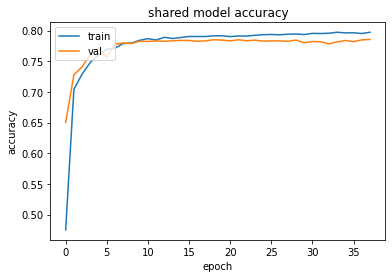

In [12]:
plot_shared(shared_history)

In [13]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared.save(trained_model)

C:\Users\mithr\miniconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


##### Load Saved Model and Evaluate

In [32]:
shared_trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared_model = load_model(shared_trained_model)

In [33]:
x_test,y_test = generate_inputs_shared(vec_test,args,indexes)

print("Evaluate on test data")

results = shared_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred_shared = shared_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
68/68 [==============================] - 2s 10ms/step - loss: 0.6070 - accuracy: 0.7885
test loss, test acc: [0.6070365309715271, 0.788504958152771]


In [34]:
m1_y_test = y_test.argmax(axis=1)
m1_y_pred = y_pred_shared.argmax(axis=1)

Classification Report

In [16]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1), target_names=target_names))

                                precision    recall  f1-score   support

                    A_ACCEPTED       0.00      0.00      0.00       537
                   A_ACTIVATED       0.99      0.48      0.64       307
                    A_APPROVED       0.66      0.53      0.59       296
                   A_CANCELLED       0.77      0.13      0.22       366
                    A_DECLINED       0.59      0.09      0.16       840
                   A_FINALIZED       0.96      0.64      0.77       551
             A_PARTLYSUBMITTED       1.00      1.00      1.00      1284
                 A_PREACCEPTED       0.53      0.94      0.68       749
                  A_REGISTERED       0.60      0.78      0.68       301
                    O_ACCEPTED       0.76      0.33      0.46       289
                   O_CANCELLED       0.98      0.52      0.68       427
                     O_CREATED       1.00      1.00      1.00       730
                    O_DECLINED       1.00      0.52      0.68  

C:\Users\mithr\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mithr\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mithr\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  537    0    0    0]
 [   0  146   33    0    0    0    0    0   82   13    1    0    0    0
     0    0    0    0    0   18    0   14]
 [   0    0  157    0    0    0    1    0   56    4    0    0    0    0
     0    0    0    0    0   28    0   50]
 [   0    0    0   47    0    0    0    0    0    0    0    0    0   53
     0    1    0    0  165    6   94    0]
 [   0    0    0    0   79    0    0  534    0    1    0    0    0    4
     0    0    6    8  149   21    8   30]
 [   0    0    0    0    0  352    0    0    0    0    0    0    0  198
     0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0 1284    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0   28    0    0  705    0    0    0    0    0    0
     0    0   16    0    0    0    0    0]
 [   0    1   24    0    0    0    0    0  235    8    0    0    0    0
     0  

<AxesSubplot:>

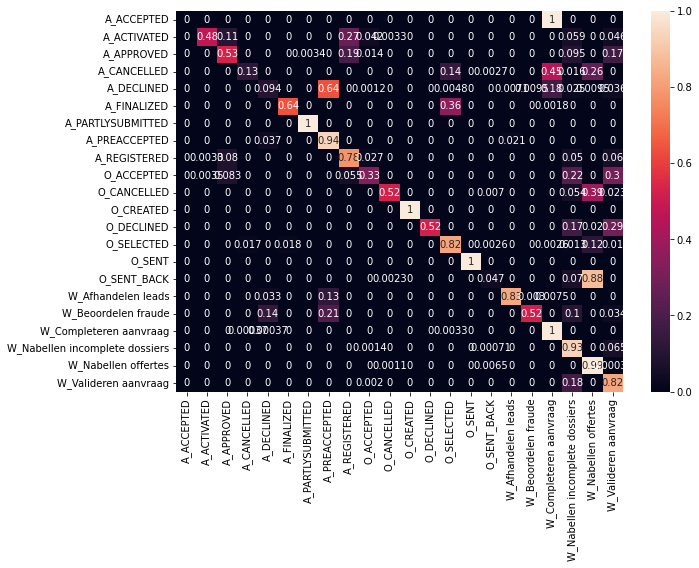

In [17]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#### specialised Model

In [18]:
specialised = specialised_model(vec_train, weights, indexes, pre_index, args)


In [19]:
specialised.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [20]:
specialised.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ac_input (InputLayer)           [(None, 5, 24)]      0                                            
__________________________________________________________________________________________________
rl_input (InputLayer)           [(None, 5, 69)]      0                                            
__________________________________________________________________________________________________
t_input (InputLayer)            [(None, 5, 1)]       0                                            
__________________________________________________________________________________________________
beta_ac (Bidirectional)         (None, 5, 100)       30000       ac_input[0][0]                   
____________________________________________________________________________________________

In [21]:
batch_size = 256 # 32, 64, 128, 256
epochs = 200

In [22]:
specialised_history = specialised_model_fit(vec_train, specialised, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

This is the output file path  c:\Users\mithr\Documents\GitHub\KBS-SI-Paper\BPIC12\models\model_specialised_All_{epoch:02d}-{val_loss:.2f}.h5
Epoch 1/200
134/134 [==============================] - 13s 49ms/step - loss: 2.8383 - accuracy: 0.2840 - val_loss: 2.5158 - val_accuracy: 0.3559
Epoch 2/200
134/134 [==============================] - 5s 36ms/step - loss: 2.3124 - accuracy: 0.4055 - val_loss: 2.1507 - val_accuracy: 0.4573
Epoch 3/200
134/134 [==============================] - 5s 39ms/step - loss: 2.0313 - accuracy: 0.4688 - val_loss: 1.9230 - val_accuracy: 0.4925loss: 2.0441 - 
Epoch 4/200
134/134 [==============================] - 5s 36ms/step - loss: 1.8482 - accuracy: 0.4953 - val_loss: 1.7611 - val_accuracy: 0.5141
Epoch 5/200
134/134 [==============================] - 5s 37ms/step - loss: 1.7182 - accuracy: 0.5138 - val_loss: 1.6408 - val_accuracy: 0.5333
Epoch 6/200
134/134 [==============================] - 5s 38ms/step - loss: 1.6168 - accuracy: 0.5303 - val_loss: 1.5469 - 

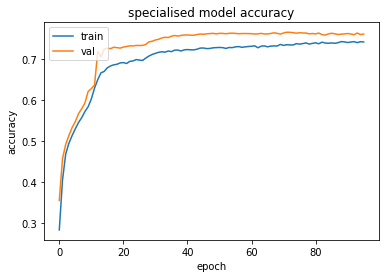

In [23]:
plot_specialised(specialised_history)

In [24]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised.save(trained_model)

C:\Users\mithr\miniconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


##### Load Saved Model and Evaluate

In [35]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised_model = load_model(trained_model)

Evaluating Prediction Performance

In [36]:
# Generating Inputs

x_test,y_test = generate_inputs(vec_test,args,indexes, experiment)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

results = specialised_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred = specialised_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
68/68 [==============================] - 2s 13ms/step - loss: 0.6679 - accuracy: 0.7704
test loss, test acc: [0.6679180860519409, 0.770446240901947]


In [37]:
m2_y_test = y_test.argmax(axis=1)
m2_y_pred = y_pred.argmax(axis=1)

In [ ]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       537
           1       1.00      0.47      0.64       307
           2       0.52      0.67      0.58       296
           3       0.62      0.14      0.22       366
           4       0.49      0.08      0.13       840
           5       0.83      0.74      0.78       551
           6       1.00      1.00      1.00      1284
           7       0.53      0.96      0.68       749
           8       0.75      0.51      0.61       301
           9       0.72      0.35      0.47       289
          10       0.97      0.48      0.64       427
          11       0.98      1.00      0.99       730
          12       1.00      0.49      0.66       100
          13       0.73      0.72      0.73       767
          14       1.00      1.00      1.00       818
          15       0.34      0.02      0.04       428
          16       0.95      0.83      0.89       666
          17       0.52    

Confusion Matrix

[[   0    0    0    1   10    0    0    0    0    0    0    0    0    0
     0    0    2    0  524    0    0    0]
 [   0  143   71    0    0    0    0    0   43   17    0    0    0    0
     0    0    0    0    0   16    0   17]
 [   0    0  197    0    0    0    0    0    0    4    0    0    0    0
     1    0    0    0    0   40    0   54]
 [   0    0    0   50    0    0    0    0    0    0    0    0    0   44
     0    0    0    0  163   12   97    0]
 [   0    0    0    1   65    1    0  549    0    1    0    0    0    3
     0    0    8    8  146   21    7   30]
 [   0    0    0    0    0  406    0    0    0    0    0    0    0  142
     0    0    0    0    3    0    0    0]
 [   0    0    0    0    0    0 1284    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0   15    0    0  720    0    0    0    0    0    0
     0    0   13    0    1    0    0    0]
 [   0    0   92    0    0    0    0    0  155   11    0    0    0    0
     0  

<AxesSubplot:>

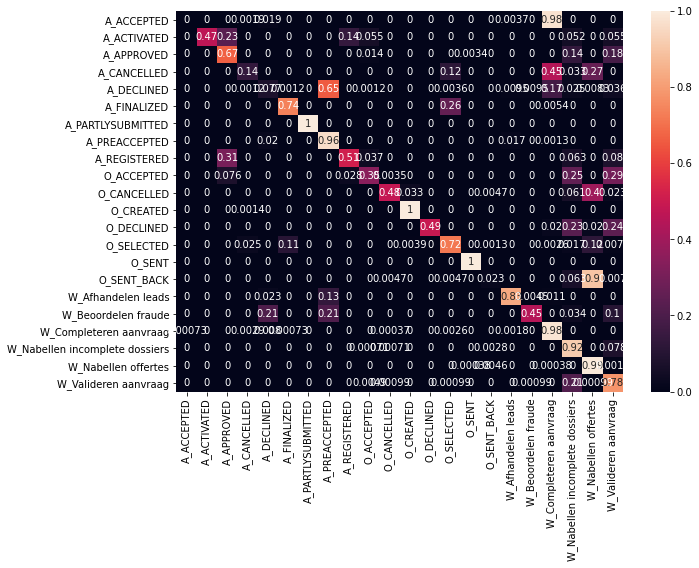

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
m1_y_pred
m2_y_test = y_test.argmax(axis=1)
m2_y_pred = y_pred.argmax(axis=1)

,y_test,m1_y_pred,m2_y_pred
0,8,21,21
1,8,21,21
2,20,20,20
3,6,6,6
4,18,18,18
...,...,...,...
17272,13,13,13
17273,14,14,14
17274,20,20,20
17275,5,5,5


In [61]:
import scipy.stats as stats
stats.ttest_ind(st['m1_y_pred'], st['m2_y_pred'])

Ttest_indResult(statistic=1.4544703326592676, pvalue=0.1458250365364149)

In [60]:
st.to_csv("st.csv")